In [1]:
from fastai.vision.all import *
from utils import *

from fastai.imports import *
from fastai.vision.widgets import *
# to easier work with paths
from pathlib import Path
matplotlib.rc('image', cmap='Greys')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os



In [3]:
import fastbook
fastbook.setup_book()

In [4]:
from fastbook import *

In [5]:
# pip install dtreeviz

In [6]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image, display_svg, SVG


from dtreeviz.trees import *
pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [7]:
path = Path()
path.ls()

(#5) [Path('.ipynb_checkpoints'),Path('TytanicTrainClassifier.html'),Path('TytanicTrainClassifier.ipynb'),Path('test.csv'),Path('train.csv')]

In [8]:
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path/'test.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,...,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",...,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",...,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",...,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",...,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",...,373450,8.0500,NaN,S


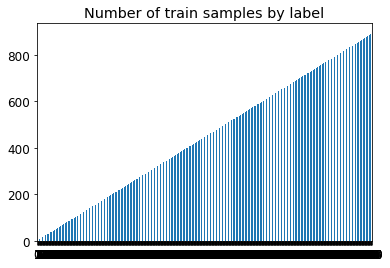

In [10]:
train.PassengerId.plot.bar(rot=0,title='Number of train samples by label');

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.isnull()

,PassengerId,Survived,Pclass,Name,...,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,...,False,False,True,False
1,False,False,False,False,...,False,False,False,False
2,False,False,False,False,...,False,False,True,False
3,False,False,False,False,...,False,False,False,False
4,False,False,False,False,...,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,...,False,False,True,False
887,False,False,False,False,...,False,False,False,False
888,False,False,False,False,...,False,False,True,False
889,False,False,False,False,...,False,False,False,False


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [16]:
procs = [Categorify, FillMissing]

In [17]:
dep_var='Survived'

In [18]:
cont,cat = cont_cat_split(train, 1, dep_var=dep_var)

In [19]:
cont

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [20]:
cat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,...,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",...,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",...,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",...,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",...,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",...,373450,8.0500,NaN,S


In [22]:
cond = train.PassengerId<660
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [23]:
to = TabularPandas(train, procs, cat, cont, y_names=dep_var, splits=splits)

In [24]:
len(to.train),len(to.valid)

(659, 232)

In [25]:
to1 = TabularPandas(train, procs, cat, cont, y_names=dep_var)

In [26]:
len(to1.train),len(to1.valid)

(891, 0)

In [27]:
to.show(3)


,Name,Sex,Ticket,Cabin,Embarked,Age_na,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,"Braund, Mr. Owen Harris",male,A/5 21171,#na#,S,False,1,3,22.0,1,0,7.250000,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C,False,2,1,38.0,1,0,71.283302,1
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,#na#,S,False,3,3,26.0,0,0,7.925000,1


In [28]:
#hide_output
to.items.head(3)

,PassengerId,Survived,Pclass,Name,...,Fare,Cabin,Embarked,Age_na
0,1,0,3,109,...,7.250000,0,3,1
1,2,1,1,191,...,71.283302,82,1,1
2,3,1,3,354,...,7.925000,0,3,1


In [29]:
to.classes['Sex']

(#3) ['#na#','female','male']

In [30]:
to.items.head(3)['Sex']

0    2
1    1
2    1
Name: Sex, dtype: int8

In [31]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [32]:
m = DecisionTreeRegressor(max_leaf_nodes=8)
m.fit(xs, y);

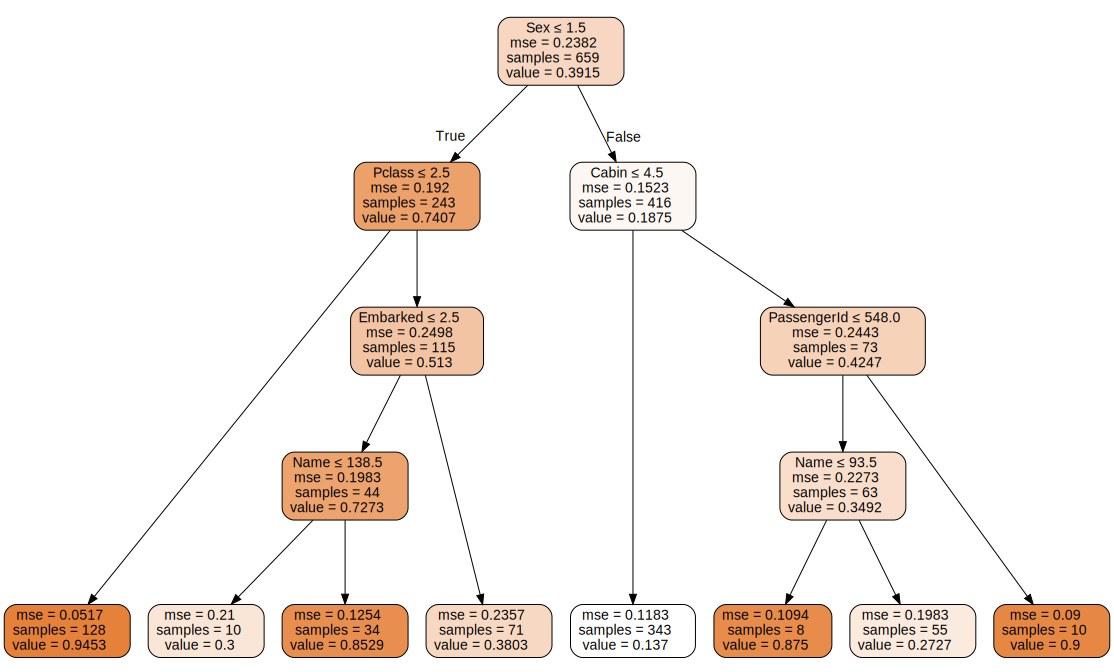

In [33]:
draw_tree(m, xs, size=500, leaves_parallel=True, precision=4)

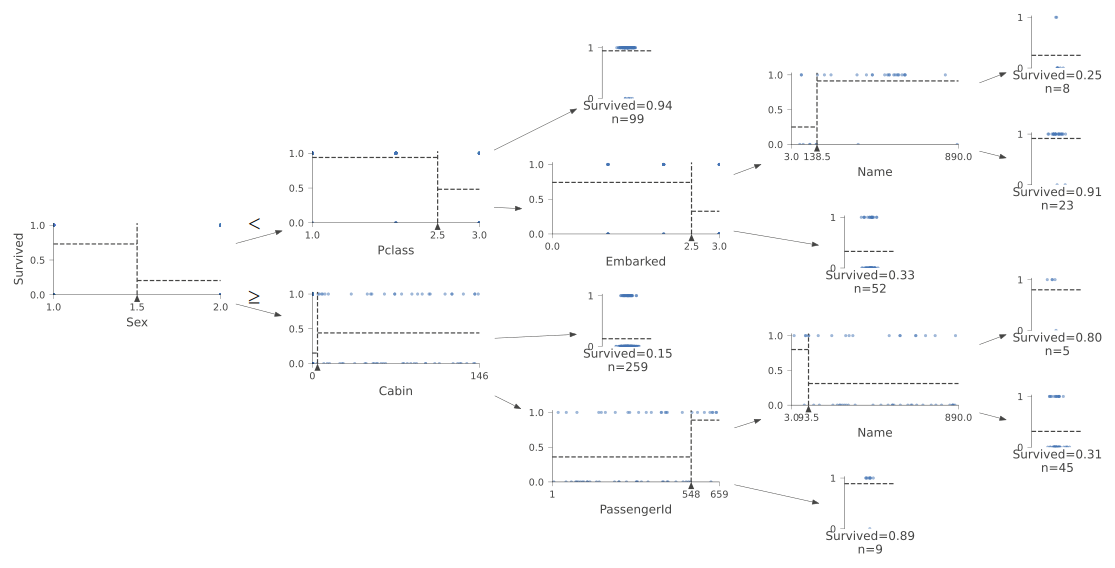

In [34]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [35]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [36]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [37]:
m_rmse(m, xs, y)

0.0

In [38]:
m_rmse(m, valid_xs, valid_y)

0.459573

In [39]:
m.get_n_leaves(), len(xs)

(112, 659)

In [40]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.353155, 0.356217)

In [41]:
m.get_n_leaves()

19

In [42]:
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [43]:
m = rf(xs, y,40, 659);

In [44]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.27515, 0.331809)

In [45]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [46]:
r_mse(preds.mean(0), valid_y)


0.331809

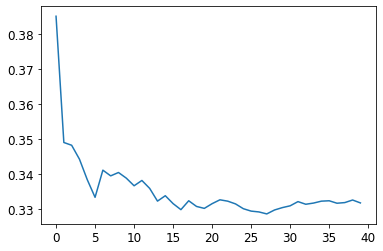

In [47]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [48]:
r_mse(m.oob_prediction_, y)

0.371861

In [49]:
preds.shape

(40, 232)

In [50]:
preds_std = preds.std(0)

In [51]:
preds_std[:5]

array([0.33084257, 0.30418751, 0.29116748, 0.33225237, 0.04760329])

In [52]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [53]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
1,Sex,0.397519
2,Ticket,0.109757
7,Pclass,0.087920
6,PassengerId,0.082666
11,Fare,0.080299
0,Name,0.080036
8,Age,0.071933
3,Cabin,0.043034
9,SibSp,0.022682
4,Embarked,0.014171


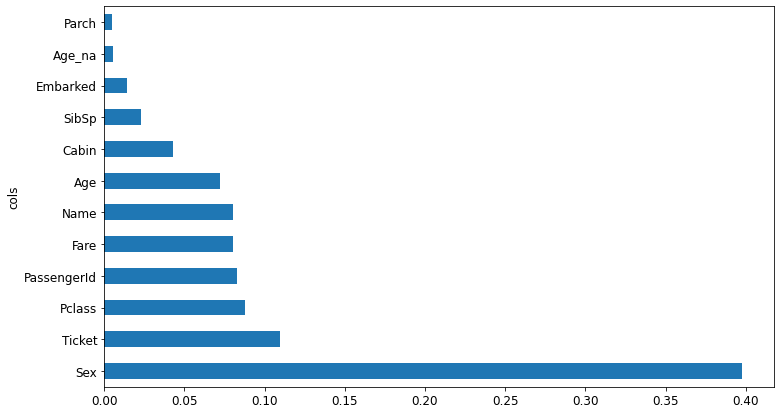

In [54]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [55]:
to_keep = fi[fi.imp>0.05].cols
len(to_keep)


7

In [56]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [57]:
m = rf(xs_imp, y, 40, 659)

In [58]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.276165, 0.344595)

In [59]:
len(xs.columns), len(xs_imp.columns)

(12, 7)

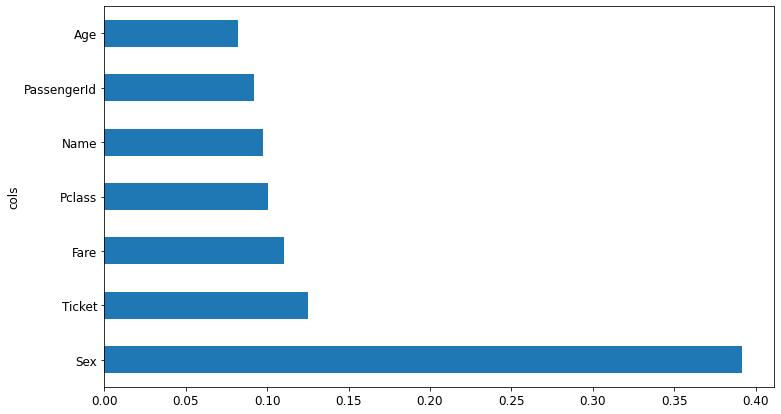

In [60]:
plot_fi(rf_feat_importance(m, xs_imp));

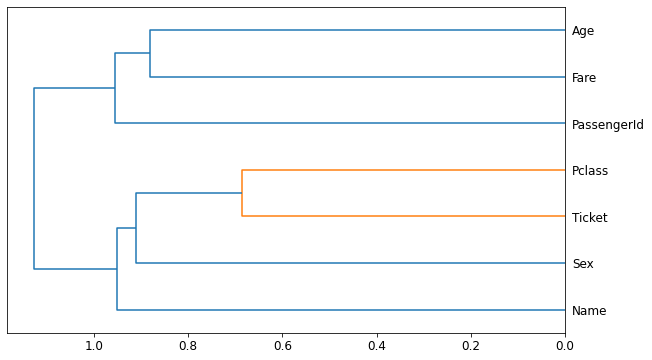

In [61]:
cluster_columns(xs_imp)

In [62]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=659, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [63]:
get_oob(xs_imp)

0.4026825209475844

In [65]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
     'Fare', 'Name','Sex',
    'Ticket', 'Pclass',
    'Age','PassengerId')}

{'Fare': 0.4065986722365542,
 'Name': 0.41288916314343393,
 'Sex': 0.16141260805662228,
 'Ticket': 0.389567376194473,
 'Pclass': 0.36978044555618783,
 'Age': 0.3957118926229394,
 'PassengerId': 0.3991188329351547}

In [67]:
to_drop = ['Fare', 'Name']
get_oob(xs_imp.drop(to_drop, axis=1))

0.389671764859589

In [68]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [69]:
m = rf(xs_final, y, 40, 659)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.303278, 0.352676)

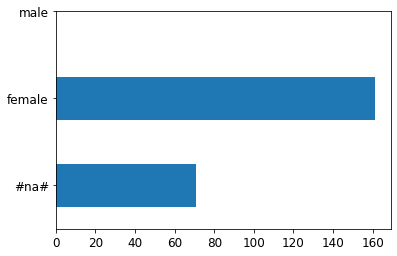

In [70]:
p = valid_xs_final['Sex'].value_counts(sort=False).plot.barh()
c = to.classes['Sex']
plt.yticks(range(len(c)), c);

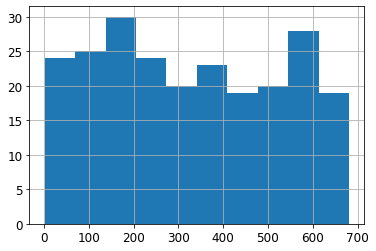

In [72]:
ax = valid_xs_final['Ticket'].hist()

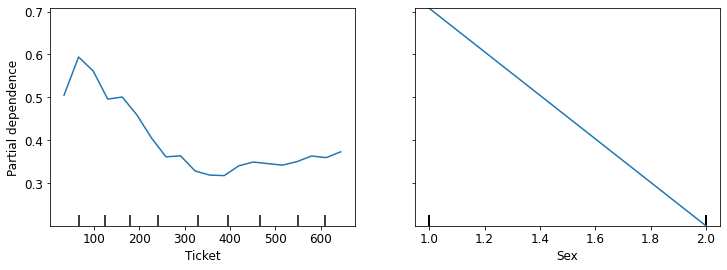

In [74]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['Ticket','Sex'],
                        grid_resolution=20, ax=ax);

In [75]:
!pip install treeinterpreter
!pip install waterfallcharts

In [76]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [77]:
row = valid_xs_final.iloc[:5]

In [78]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [79]:
prediction[0], bias[0], contributions[0].sum()

(array([0.38611587]), 0.3925644916540213, -0.006448620188885057)

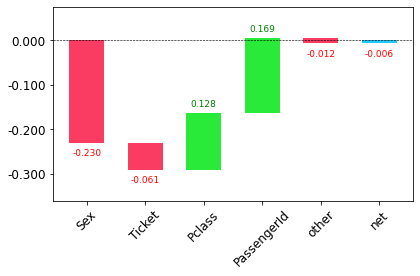

In [80]:
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

In [81]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid, 40, 891)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
3,PassengerId,0.971826
1,Ticket,0.012587
4,Age,0.011787
0,Sex,0.002671
2,Pclass,0.001130


In [82]:
m = rf(xs_final, y, 40, 659)
print('orig', m_rmse(m, valid_xs_final, valid_y))

c =('PassengerId')
m = rf(xs_final.drop(c,axis=1), y, 40 ,659)
print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 0.353212
PassengerId 0.352186


In [84]:
# Using a Neural Network¶

In [85]:
df_nn = pd.read_csv(path/'train.csv', low_memory=False)

In [99]:
df_nn_final = df_nn[list(xs_imp.columns) + [dep_var]]

In [111]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [101]:
cont_nn,cat_nn

(['Fare', 'Age'], ['Sex', 'Ticket', 'Pclass', 'PassengerId', 'Name'])

In [102]:
df_nn_final[cat_nn].nunique()


Sex              2
Ticket         681
Pclass           3
PassengerId    891
Name           891
dtype: int64

In [107]:
xs_filt = xs_imp.drop('PassengerId', axis=1).drop('Name', axis=1)
valid_xs_time = valid_xs_imp.drop('PassengerId', axis=1).drop('Name', axis=1)
m2 = rf(xs_filt, y, 40, 659)
m_rmse(m2, xs_filt, y), m_rmse(m2, valid_xs_time, valid_y)

(0.302747, 0.343903)

In [112]:
cat_nn.remove('PassengerId')

In [113]:
cat_nn.remove('Name')

In [134]:
df_nn_final['Survived'] 

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float32

In [135]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

In [136]:
dls = to_nn.dataloaders()

In [137]:
dls

In [138]:
y = to_nn.train.y
y.min(),y.max()

(0.0, 1.0)

In [117]:
from fastai.tabular.all import *

In [139]:
learn = tabular_learner(dls, y_range=(0.001,1), layers=[300,150],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(lr_min=0.04365158379077912, lr_steep=0.007585775572806597)

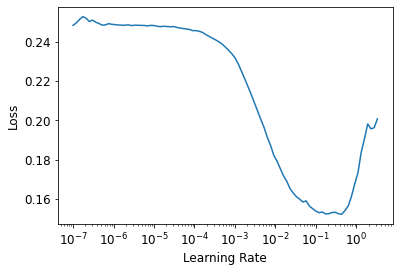

In [140]:
learn.lr_find()

In [141]:
learn.fit_one_cycle(5, 0.0075)

epoch,train_loss,valid_loss,time
0,0.210068,0.219418,00:00
1,0.129276,0.184586,00:00
2,0.099304,0.154412,00:00
3,0.078275,0.154616,00:00
4,0.064934,0.139970,00:00


In [142]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

0.374125

In [145]:
df_nn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [146]:
xs.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age_na', 'PassengerId',
       'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [150]:
df_nn_final2 = df_nn[list(df_nn.columns) + [dep_var]]

In [153]:
df_nn_final2.dtypes, df_nn_final.dtypes

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 Survived         int64
 dtype: object,
 Sex             object
 Ticket          object
 Pclass           int64
 PassengerId      int64
 Fare           float64
 Name            object
 Age            float64
 Survived       float32
 dtype: object)

In [158]:
cont_nn,cat_nn = cont_cat_split(df_nn_final2, max_card=9000, dep_var=dep_var)

In [160]:
df_nn_final2[cat_nn].nunique()

PassengerId    891
Pclass           3
Name           891
Sex              2
SibSp            7
Parch            7
Ticket         681
Cabin          147
Embarked         3
dtype: int64

In [161]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final2, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().